In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms
import sklearn.datasets
import sklearn.preprocessing
import sklearn.model_selection

In [2]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
x = imagenes
y = numeros['target']

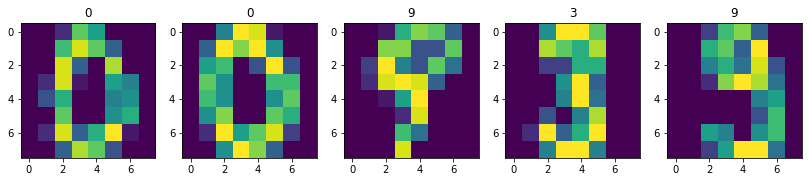

In [3]:
random_items = np.random.choice(np.arange(n_imagenes), 5)

plt.figure(figsize=(14,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    item  = random_items[i]
    plt.imshow(x[item])
    plt.title(y[item])

In [4]:
x = torch.autograd.Variable(torch.Tensor(x).float())
y = torch.autograd.Variable(torch.Tensor(y).long())
print(x.shape,y.shape)

mean = x.mean(dim=0)
std = x.std(dim=0)
std[std==0]=1.0

for i in range(len(x)):
    x[i] = (x[i]-mean)/std

print(np.shape(x))

torch.Size([1797, 8, 8]) torch.Size([1797])
torch.Size([1797, 8, 8])


In [5]:
x = x.unsqueeze(1)
print(np.shape(x))

torch.Size([1797, 1, 8, 8])


In [6]:
class Autoencoder1Conv(torch.nn.Module): # kernel 1, 7 # l_s 8, 2
    def __init__(self,kernel):
        super(Autoencoder1Conv,self).__init__()
        self.kernel = kernel
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1,15,self.kernel,1))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(15,1,self.kernel,1))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
class Autoencoder2Conv(torch.nn.Module): # kernel 4, 3, 2, 1  # l_s 4, 5, 6, 7
    def __init__(self,kernel):
        super(Autoencoder2Conv,self).__init__()
        self.kernel = kernel
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1,15,self.kernel,1),
            torch.nn.Conv2d(15,7,2,1))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(7,15,2,1),
            torch.nn.ConvTranspose2d(15,1,self.kernel,1))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


class Autoencoder3Conv(torch.nn.Module): #kernel 5, 4, 3, 2 # l_s 2, 3, 4, 5
    def __init__(self,kernel):
        super(Autoencoder3Conv,self).__init__()
        self.kernel = kernel
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1,15,self.kernel,1),
            torch.nn.Conv2d(15,7,2,1),
            torch.nn.Conv2d(7,5,2,1))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(5,7,2,1),
            torch.nn.ConvTranspose2d(7,15,2,1),
            torch.nn.ConvTranspose2d(15,1,self.kernel,1))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [7]:
conv1 = [1,7]
conv2 = [5,4,3,2]
conv3 = [4,3,2,1]
num_epochs = 100
loss_arr = []
N_L = []
N_C = []

for element in conv1:
    #model training
    model = Autoencoder1Conv(element)
    distance = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1E-4)
    for epoch in range(num_epochs):
        output = model(x)
        loss = distance(output, x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    #loss
    output = model(x)
    loss = distance(output, x)
    loss_arr.append(loss)
    
    #number of parameters
    n_c = 0
    for m in model.parameters():
        n_c += m.flatten().size()[0]
    N_C.append(n_c)
    
    #latent space
    latent_space = model.encoder(x)
    n_l = np.shape(latent_space[0][2].detach().numpy())[0]
    N_L.append(n_l)

for element in conv2:
    #model training
    model = Autoencoder2Conv(element)
    distance = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1E-4)
    for epoch in range(num_epochs):
        output = model(x)
        loss = distance(output, x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    #loss
    output = model(x)
    loss = distance(output, x)
    loss_arr.append(loss)
    
    #number of parameters
    n_c = 0
    for m in model.parameters():
        n_c += m.flatten().size()[0]
    N_C.append(n_c)
    
    #latent space
    latent_space = model.encoder(x)
    n_l = np.shape(latent_space[0][2].detach().numpy())[0]
    N_L.append(n_l)

for element in conv3:
    #model training
    model = Autoencoder3Conv(element)
    distance = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1E-4)
    for epoch in range(num_epochs):
        output = model(x)
        loss = distance(output, x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    #loss
    output = model(x)
    loss = distance(output, x)
    loss_arr.append(loss)
    
    #number of parameters
    n_c = 0
    for m in model.parameters():
        n_c += m.flatten().size()[0]
    N_C.append(n_c)
    
    #latent space
    latent_space = model.encoder(x)
    n_l = np.shape(latent_space[0][2].detach().numpy())[0]
    N_L.append(n_l)

Text(0, 0.5, 'N_C')

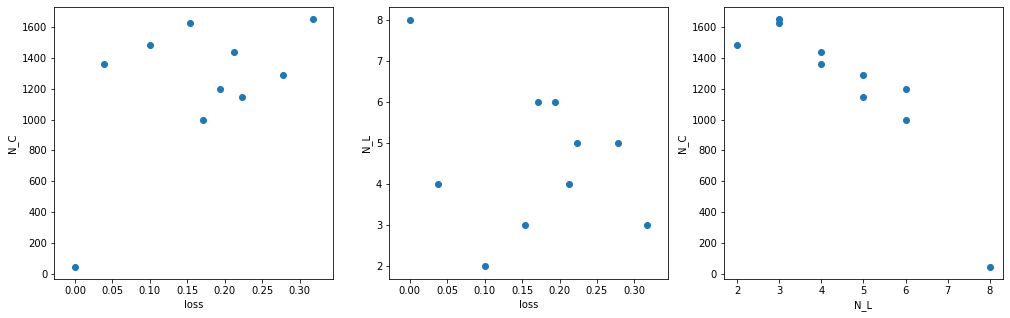

In [20]:
loss_arr = np.array(loss_arr)
N_C = np.array(N_C)
N_L = np.array(N_L)
plt.figure(figsize = (17,5))
plt.subplot(131)
plt.scatter(loss_arr,N_C)
plt.xlabel('loss')
plt.ylabel('N_C')
plt.subplot(132)
plt.scatter(loss_arr, N_L)
plt.xlabel('loss')
plt.ylabel('N_L')
plt.subplot(133)
plt.scatter(N_L, N_C)
plt.xlabel('N_L')
plt.ylabel('N_C')

Text(0, 0.5, 'N_L')

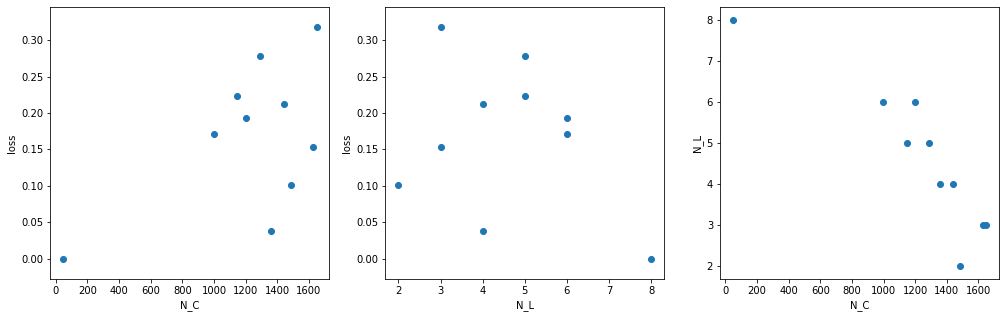

In [21]:
loss_arr = np.array(loss_arr)
N_C = np.array(N_C)
N_L = np.array(N_L)
plt.figure(figsize = (17,5))
plt.subplot(131)
plt.scatter(N_C,loss_arr)
plt.xlabel('N_C')
plt.ylabel('loss')
plt.subplot(132)
plt.scatter(N_L,loss_arr)
plt.xlabel('N_L')
plt.ylabel('loss')
plt.subplot(133)
plt.scatter(N_C, N_L)
plt.xlabel('N_C')
plt.ylabel('N_L')

Si bien los resultados no son muy claros, si parece haber una entendencia en los resultados. De la primera gráfica a la izquierda, se ve que entre más complejo sea el modelo, el loss va siendo mayor. De la segunda se ve que entre más grande sea la dimensión del espacio latente, el loss va bajando (como la entrada son imágenes 8x8, cuando el espacio latente es de 8x8, el loss es el mejor). Y por último, a la derecha se ve claramente como entre más compleja sea la arquitectura de la red, las dimensiones del espacio latente serán más pequeñas, lo cual tiene mucho sentido. Es importante mencionar que hay dimensiones de espacios latentes repetidas, y por esta razón las gráficas dan extrañas, pero las tendencias están. Ahora bien, considerando que la idea de un autoenconder es bajar la dimensionalidad del problema, se debería buscar un balance entre el loss, y el tamaño del espacio latente. Un resultado muy bueno, se ve que es N_C $\approx$ 1400, loss $\approx$ 0.05 y N_L 4. Este modelo mantiene un buen loss, y logra reducir la dimensionalidad de las imágenes de entrada 